<a href="https://colab.research.google.com/github/muhammadefan/just_do_it/blob/main/Clustering%20%5BTabular%5D%3A%20Customer%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Segmentation on a Marketplace**

by Muhammad Efan Abdulfattah

### 1. Data Preparation

#### 1.1 Data Loading

In [ ]:
import numpy as np
import pandas as pd # data processing
import re # regular-expression (regex)
import random

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

# ignoring future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os
path = '/content/drive/MyDrive/learningPy/dataset/' # you need to adjust this path
os.listdir(path)

In [6]:
# read the dataset
df = pd.read_csv(path+'customer_segments.csv')
df.head(3)

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,Budi Anggara,Pria,58 tahun,Wiraswasta,Sector,9497927
1,Shirley Ratuwati,Wanita,14,NaN,Cluster,2722700
2,Agus Cahyono,Pria,48,Professional,Cluster,5286429


#### 1.2 Data Understanding

```
Nama Pelanggan      = customer's name
Jenis Kelamin       = gender
Umur                = age
Profesi             = customer's job name
Tipe Residen        = residence type
NilaiBelanjaSetahun = yearly expenditure
```

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Nama Pelanggan       115 non-null    object
 1   Jenis Kelamin        115 non-null    object
 2   Umur                 108 non-null    object
 3   Profesi              104 non-null    object
 4   Tipe Residen         115 non-null    object
 5   NilaiBelanjaSetahun  115 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 5.5+ KB


As the information above, we know that datatype of 'Umur' is not numeric (int or float), thus, let's do an inspection!

#### 1.3 Data Cleansing

##### **Duplicated Data Checking**

In [ ]:
# duplication check
df.duplicated().sum()

13

In [ ]:
# drop duplicated data
df.drop_duplicates(inplace=True)

In [ ]:
# duplication check once again
df.duplicated().sum()

0

##### **Feature Inspection: Umur**

In [ ]:
# data preview
df['Umur'].unique()

array(['58 tahun', '14', '48', '53', '41', '24', '64thn', '52', '29',
       '33 tahun', '50', '49', '64', '60', '20', '35', '32', '63', '16',
       '38', '34', '39', '55', '40', '56', '46', '19', '47', '21', '30',
       '25', '26', '31', '18', '22', '45', '33', nan, '27', '17',
       '51 thn', '37', '28', '51', '30 tahun'], dtype=object)

In [ ]:
# create a function for cleaning the data & converting its datatype
def age_inspection(data):
  if data is not np.NaN:
    value = re.sub('[A-Z a-z \s]','',data) 
    return float(value)
  else:
    return data

# execute the function
df['Umur'] = df['Umur'].apply(age_inspection)

In [ ]:
# data preview
df['Umur'].unique()

array([58., 14., 48., 53., 41., 24., 64., 52., 29., 33., 50., 49., 60.,
       20., 35., 32., 63., 16., 38., 34., 39., 55., 40., 56., 46., 19.,
       47., 21., 30., 25., 26., 31., 18., 22., 45., nan, 27., 17., 51.,
       37., 28.])

##### **Missing Value Checking**

In [ ]:
df.isna().sum()

Nama Pelanggan         0
Jenis Kelamin          0
Umur                   7
Profesi                9
Tipe Residen           0
NilaiBelanjaSetahun    0
dtype: int64

###### Feature: Umur

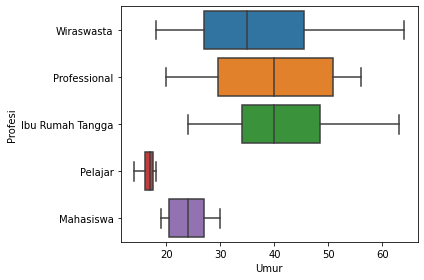

In [ ]:
# data visualization
sns.boxplot(x='Umur', y='Profesi', data=df)

plt.tight_layout()
plt.show()

In [ ]:
# look for q1 & q3 in 'Umur' feature
q1_wrs = df[df['Profesi'] == 'Wiraswasta'].quantile(q=0.25, axis=0, numeric_only=True)['Umur']
q3_wrs = df[df['Profesi'] == 'Wiraswasta'].quantile(q=0.75, axis=0, numeric_only=True)['Umur']

q1_pro = df[df['Profesi'] == 'Professional'].quantile(q=0.25, axis=0, numeric_only=True)['Umur']
q3_pro = df[df['Profesi'] == 'Professional'].quantile(q=0.75, axis=0, numeric_only=True)['Umur']

q1_irt = df[df['Profesi'] == 'Ibu Rumah Tangga'].quantile(q=0.25, axis=0, numeric_only=True)['Umur']
q3_irt = df[df['Profesi'] == 'Ibu Rumah Tangga'].quantile(q=0.75, axis=0, numeric_only=True)['Umur']

q1_plj = df[df['Profesi'] == 'Pelajar'].quantile(q=0.25, axis=0, numeric_only=True)['Umur']
q3_plj = df[df['Profesi'] == 'Pelajar'].quantile(q=0.75, axis=0, numeric_only=True)['Umur']

q1_mhs = df[df['Profesi'] == 'Mahasiswa'].quantile(q=0.25, axis=0, numeric_only=True)['Umur']
q3_mhs = df[df['Profesi'] == 'Mahasiswa'].quantile(q=0.75, axis=0, numeric_only=True)['Umur']

# data preview
print(q1_wrs, q1_pro, q1_irt, q1_plj, q1_mhs)
print(q3_wrs, q3_pro, q3_irt, q3_plj, q3_mhs)

27.0 29.5 34.0 16.0 20.5
45.5 50.75 48.5 17.5 27.0


In [ ]:
# create a function for imputing the missing value using some conditions
def impute_umur(data):
  profesi = data[0]
  umur = data[1]

  if pd.isna(umur):
    if profesi == 'Wiraswasta':
      return int(random.uniform(q1_wrs, q3_wrs))
    elif profesi == 'Professional':
      return int(random.uniform(q1_pro, q3_pro))
    elif profesi == 'Ibu Rumah Tangga':
      return int(random.uniform(q1_irt, q3_irt))
    elif profesi == 'Pelajar':
      return int(random.uniform(q1_plj, q3_plj))
    elif profesi == 'Mahasiswa':
      return int(random.uniform(q1_mhs, q3_mhs))
    
  else:
    return int(umur)

# execute the function
df['Umur'] = df[['Profesi', 'Umur']].apply(impute_umur, axis=1)

In [ ]:
# missing value checking
df.isna().sum()

Nama Pelanggan         0
Jenis Kelamin          0
Umur                   0
Profesi                9
Tipe Residen           0
NilaiBelanjaSetahun    0
dtype: int64

In [ ]:
# data preview
df['Umur'].unique()

array([58, 14, 48, 53, 41, 24, 64, 52, 29, 33, 50, 49, 60, 20, 35, 32, 63,
       16, 38, 34, 39, 55, 40, 56, 46, 19, 47, 21, 30, 25, 26, 31, 18, 22,
       45, 42, 27, 17, 51, 37, 28])

###### Feature: Profesi

In [ ]:
df.isna().sum()

Nama Pelanggan         0
Jenis Kelamin          0
Umur                   0
Profesi                9
Tipe Residen           0
NilaiBelanjaSetahun    0
dtype: int64

In [ ]:
# drop missing value
df.dropna(axis=0, how='any', inplace=True)

# missing value checking
df.isna().sum()

Nama Pelanggan         0
Jenis Kelamin          0
Umur                   0
Profesi                0
Tipe Residen           0
NilaiBelanjaSetahun    0
dtype: int64

##### **Index Re-arranging**

In [ ]:
# check the index
df.tail()

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
108,Huang Irene,Wanita,40,Ibu Rumah Tangga,Sector,10141941
109,Ayu Setiawan,Wanita,32,Wiraswasta,Sector,4540962
111,Amiruddiah Ratuwati,Wanita,25,Mahasiswa,Sector,6440628
112,Abdullah,Pria,27,Wiraswasta,Sector,6586943
113,Rahiman,Pria,20,Mahasiswa,Sector,4242456


In [ ]:
# resetting the index
df.reset_index(drop=True, inplace=True)

# data preview
df.tail()

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
88,Huang Irene,Wanita,40,Ibu Rumah Tangga,Sector,10141941
89,Ayu Setiawan,Wanita,32,Wiraswasta,Sector,4540962
90,Amiruddiah Ratuwati,Wanita,25,Mahasiswa,Sector,6440628
91,Abdullah,Pria,27,Wiraswasta,Sector,6586943
92,Rahiman,Pria,20,Mahasiswa,Sector,4242456


#### 1.4 Exploratory Data Analysis

##### **Number of Customers**

note:
```
df_train['Umur'] (first way) or df_train.Umur (second way) will be resulting the same output.
The difference is, second way can only be done if the name of feature doesn't separated by whitespace, ex.: 'NilaiBelanjaSetahun'.
```

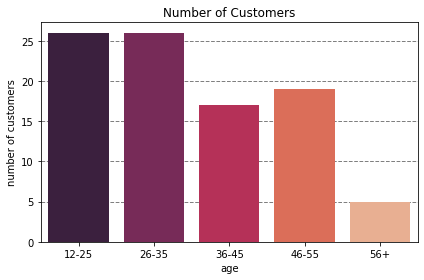

In [ ]:
# find some data
u18_25 = df[(df['Umur'] <= 25) & (df['Umur'] >=12)]['Umur']
u26_35 = df[(df['Umur'] <= 35) & (df['Umur'] >=26)]['Umur']
u36_45 = df[(df['Umur'] <= 45) & (df['Umur'] >=36)]['Umur']
u46_55 = df[(df['Umur'] <= 55) & (df['Umur'] >=46)]['Umur']
u56_up = df[df['Umur'] >= 56]['Umur']

# define variable for each axis
X = ["12-25","26-35","36-45","46-55","56+"]
Y = [len(u18_25), len(u26_35), len(u36_45), len(u46_55), len(u56_up)]

# create a barplot
plt.grid(axis='y', zorder=0, linestyle='--', linewidth=1, color='gray')
sns.barplot(x=X, y=Y, palette="rocket", zorder=2)

plt.title("Number of Customers")
plt.xlabel("age")
plt.ylabel("number of customers")

plt.tight_layout()
plt.show()

Based on the chart above, number of customer is dominated by juvenile and early adulthood / people on productive age.

##### **Annual Total Spending**

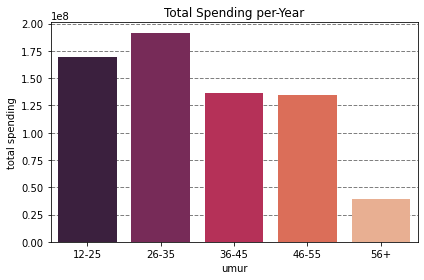

In [ ]:
# find some data
s14_25 = df[(df['Umur'] <= 25) & (df['Umur'] >=14)]['NilaiBelanjaSetahun'].sum() # juvenile
s26_35 = df[(df['Umur'] <= 35) & (df['Umur'] >=26)]['NilaiBelanjaSetahun'].sum() # early adulthood
s36_45 = df[(df['Umur'] <= 45) & (df['Umur'] >=36)]['NilaiBelanjaSetahun'].sum() # middle adulthood
s46_55 = df[(df['Umur'] <= 55) & (df['Umur'] >=46)]['NilaiBelanjaSetahun'].sum() # late adulthood
s56_up = df[df['Umur'] >= 56]['NilaiBelanjaSetahun'].sum() # elderly people

# define the variable for each axis
X = ["14-25","26-35","36-45","46-55","56+"]
Y = [s14_25, s26_35, s36_45, s46_55, s56_up]

# create a barplot
plt.grid(axis='y', zorder=0, linestyle='--', linewidth=1, color='gray')
sns.barplot(x=X, y=Y, palette="rocket", zorder=2)

plt.title("Total Spending per-Year")
plt.xlabel("umur")
plt.ylabel("total spending")

plt.tight_layout()
plt.show()

Based on the chart above, we can get more insight that younger the customer, the more they spend their money, and the big spender are people in early adulthood age.

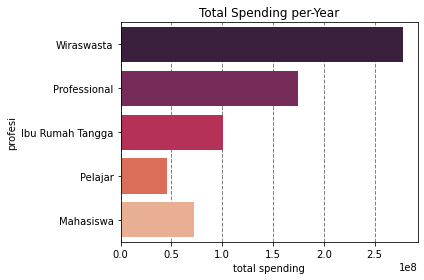

In [ ]:
# find some data
p_wrs = df[df['Profesi'] == 'Wiraswasta']['NilaiBelanjaSetahun'].sum()
p_pro = df[df['Profesi'] == 'Professional']['NilaiBelanjaSetahun'].sum()
p_irt = df[df['Profesi'] == 'Ibu Rumah Tangga']['NilaiBelanjaSetahun'].sum()
p_plj = df[df['Profesi'] == 'Pelajar']['NilaiBelanjaSetahun'].sum()
p_mhs = df[df['Profesi'] == 'Mahasiswa']['NilaiBelanjaSetahun'].sum()

# define a variable for x-axis
X = [p_wrs, p_pro, p_irt, p_plj, p_mhs]

# create a barplot
plt.grid(axis='x', zorder=0, linestyle='--', linewidth=1, color='gray')
sns.barplot(x=X, y=df['Profesi'].unique(), palette='rocket', zorder=2)

plt.title("Total Spending per-Year")
plt.xlabel("total spending")
plt.ylabel("profesi")

plt.tight_layout()
plt.show()

Based on the graph above, people who work as 'Wiraswasta' are likely to spend money more than others.

And, obviously, the most economical people are juvenile.

### 2. Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Nama Pelanggan       93 non-null     object
 1   Jenis Kelamin        93 non-null     object
 2   Umur                 93 non-null     int64 
 3   Profesi              93 non-null     object
 4   Tipe Residen         93 non-null     object
 5   NilaiBelanjaSetahun  93 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 4.5+ KB


#### 2.1 Drop Unnecessary Feature

###### **Drop: Nama Pelanggan**

In [ ]:
# drop the feature
df_modelling = df.drop(columns='Nama Pelanggan', axis=1)

In [ ]:
df_modelling.sample()

,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
48,Pria,41,Professional,Sector,4898925


#### 2.2 Datatype Checking & Data Encoding

In [ ]:
df_modelling.dtypes

Jenis Kelamin          object
Umur                    int64
Profesi                object
Tipe Residen           object
NilaiBelanjaSetahun     int64
dtype: object

As we can see above, there are some features which are misclassified, so, we need to convert it first in order we can use it in data modelling.

In [ ]:
# encode the data using one hot encoding
gender = pd.get_dummies(df_modelling['Jenis Kelamin'], drop_first=True)
profesi = pd.get_dummies(df_modelling['Profesi'], drop_first=True)
residen = pd.get_dummies(df_modelling['Tipe Residen'], drop_first=True)

In [ ]:
# concatenate the df_train and encoded data
df_modelling = pd.concat([df_modelling, gender, profesi, residen], axis=1)

# data preview
df_modelling.sample()

,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,Wanita,Mahasiswa,Pelajar,Professional,Wiraswasta,Sector
10,Wanita,64,Wiraswasta,Cluster,9333168,1,0,0,0,1,0


In [ ]:
# drop unused features
df_modelling.drop(columns=['Jenis Kelamin', 'Profesi', 'Tipe Residen'], axis=1, inplace=True)

# data preview
df_modelling.sample()

,Umur,NilaiBelanjaSetahun,Wanita,Mahasiswa,Pelajar,Professional,Wiraswasta,Sector
73,25,6499491,1,0,0,0,0,1


### 3. Data Modelling

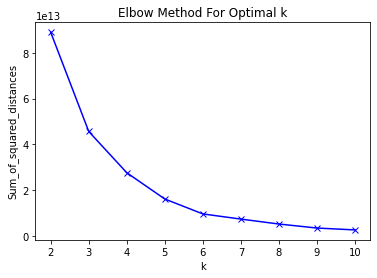

In [ ]:
from sklearn.cluster import KMeans

# doing elbow method
sum_of_squared_distances = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_modelling)
    sum_of_squared_distances.append(km.inertia_)


# viz for finding the best K-value
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# 'n_cluster' value based on elbow method
cluster = KMeans(n_clusters=5)

# training phase
cluster.fit(df_modelling)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# create a series for storing the data modelling result
segment = pd.Series(cluster.labels_, name="segment")

In [ ]:
# data concatenation
df_result = pd.concat([df_train, segment], axis=1)

# data preview
df_result.head(10)

,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
0,Budi Anggara,Pria,58.0,Wiraswasta,Sector,9497927,4
1,Agus Cahyono,Pria,14.0,Professional,Cluster,5286429,1
2,Antonius Winarta,Pria,48.0,Professional,Cluster,5204498,1
3,"Ibu Sri Wahyuni, IR",Wanita,53.0,Wiraswasta,Cluster,10615206,0
4,Rosalina Kurnia,Wanita,41.0,Professional,Cluster,5215541,1
5,Agus Kuncoro,Pria,24.0,Wiraswasta,Sector,9837260,0
6,Danang Santosa,Pria,64.0,Professional,Cluster,5223569,1
7,Elisabeth Suryadinata,Wanita,52.0,Professional,Sector,5993218,1
8,Maria Suryawan,Wanita,29.0,Professional,Sector,5987367,1
9,Erliana Widjaja,Wanita,NaN,Professional,Sector,5941914,1


**Final Result**

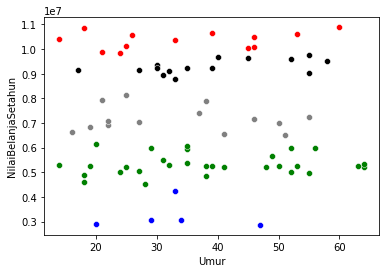

In [ ]:
sns.scatterplot(x=df_result[df_result["segment"]==0]['Umur'], y=df_result[df_result["segment"]==0]['NilaiBelanjaSetahun'], color="red")
sns.scatterplot(x=df_result[df_result["segment"]==1]['Umur'], y=df_result[df_result["segment"]==1]['NilaiBelanjaSetahun'], color="green")
sns.scatterplot(x=df_result[df_result["segment"]==2]['Umur'], y=df_result[df_result["segment"]==2]['NilaiBelanjaSetahun'], color="blue")
sns.scatterplot(x=df_result[df_result["segment"]==3]['Umur'], y=df_result[df_result["segment"]==3]['NilaiBelanjaSetahun'], color="gray")
sns.scatterplot(x=df_result[df_result["segment"]==4]['Umur'], y=df_result[df_result["segment"]==4]['NilaiBelanjaSetahun'], color="black")

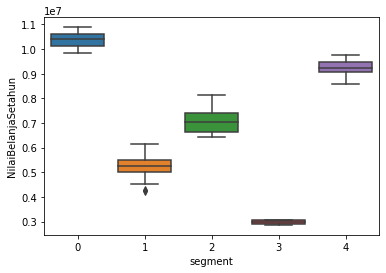

In [ ]:
sns.boxplot(x="segment", y="NilaiBelanjaSetahun", data=df_result)

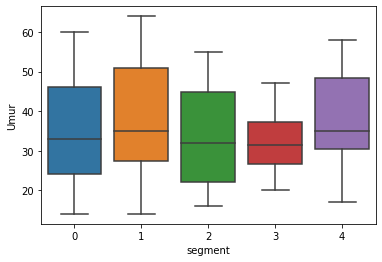

In [ ]:
sns.boxplot(x="segment", y="Umur", data=df_result)